# instal packages/lib yang di perlukan

In [1]:
# installing TensorFLow Version 2.3.1
from IPython.display import clear_output
!pip install -q tensorflow==2.3.1
clear_output()

In [2]:
# install tensorflow quantum
!pip install -q tensorflow_quantum
clear_output()

In [3]:
#install cirq
!pip install cirq
clear_output()

In [20]:
!pip install tensorflow
clear_output()

# Mengimpor dataset dan lib yang diperlukan

In [4]:
import tensorflow as tf

# Data Processing tools
import numpy as np
from sklearn.model_selection import train_test_split

# QML tools
import tensorflow_quantum as tfq
import cirq
import sympy

# Visualization Tools
from cirq.contrib.svg import SVGCircuit
import matplotlib.pyplot as plt

# cek versi ciraq dan tensorflow quantum kita

In [299]:
#cetak versi cirq dan tfq yang akan kita gunakan
print("We are using the TensorFlow-Quantum version {}".format(tfq.__version__))
print("We are using the Cirq version {}".format(cirq.__version__))

We are using the TensorFlow-Quantum version 0.7.2
We are using the Cirq version 1.4.1


# NN

In [304]:

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [308]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

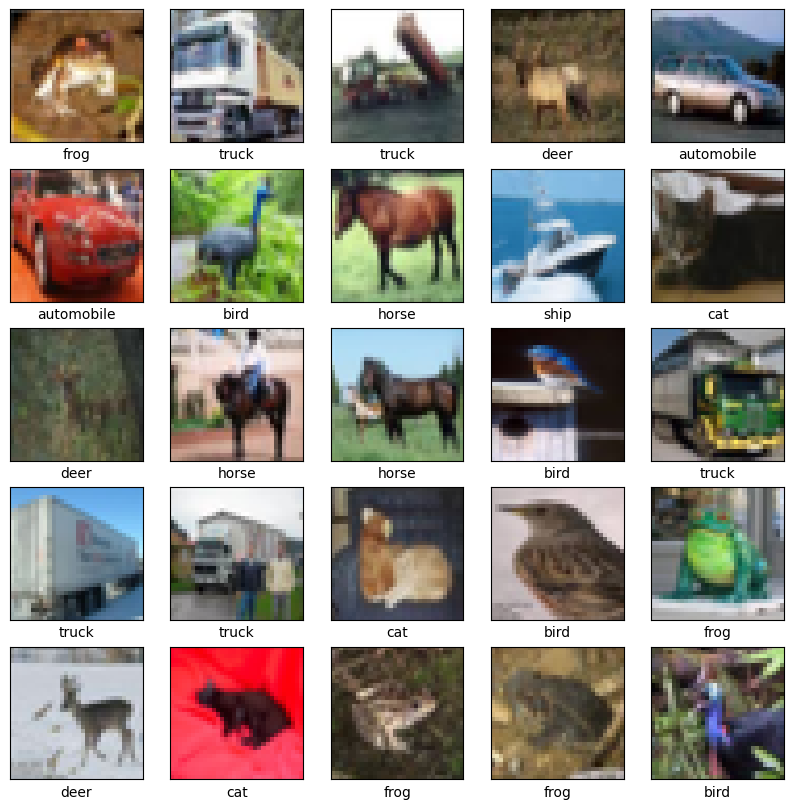

In [310]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [318]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [319]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [320]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [321]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [325]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 0.7748 - accuracy: 0.7297 - val_loss: 1.1323 - val_accuracy: 0.6399
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7301 - accuracy: 0.7458 - val_loss: 1.1031 - val_accuracy: 0.6502
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6957 - accuracy: 0.7582 - val_loss: 1.1351 - val_accuracy: 0.6484
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6702 - accuracy: 0.7653 - val_loss: 1.1733 - val_accuracy: 0.6428
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6363 - accuracy: 0.7773 - val_loss: 1.1791 - val_accuracy: 0.6489
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6105 - accuracy: 0.7862 - val_loss: 1.1727 - val_accuracy: 0.6545
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5893 - accuracy: 0.7951 - val_loss: 1.2265 - val_accuracy

313/313 - 1s - loss: 1.3998 - accuracy: 0.6343 - 669ms/epoch - 2ms/step


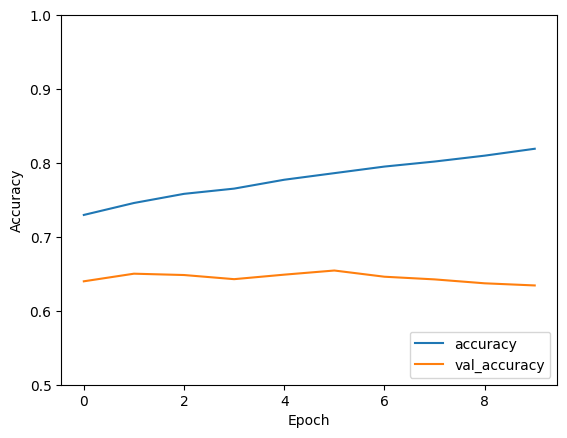

In [326]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [327]:
print(test_acc)

0.6342999935150146


## QNN

In [328]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [329]:
# Define QNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))  # Output layer with 10 classes

In [330]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [331]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.4952 - accuracy: 0.4528 - val_loss: 1.2257 - val_accuracy: 0.5656
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1406 - accuracy: 0.5958 - val_loss: 1.0535 - val_accuracy: 0.6260
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9960 - accuracy: 0.6502 - val_loss: 0.9903 - val_accuracy: 0.6512
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9011 - accuracy: 0.6849 - val_loss: 0.9599 - val_accuracy: 0.6652
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8326 - accuracy: 0.7089 - val_loss: 0.9305 - val_accuracy: 0.6810
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7740 - accuracy: 0.7273 - val_loss: 0.9030 - val_accuracy: 0.6909
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7189 - accuracy: 0.7478 - val_loss: 0.8547 - val_accurac

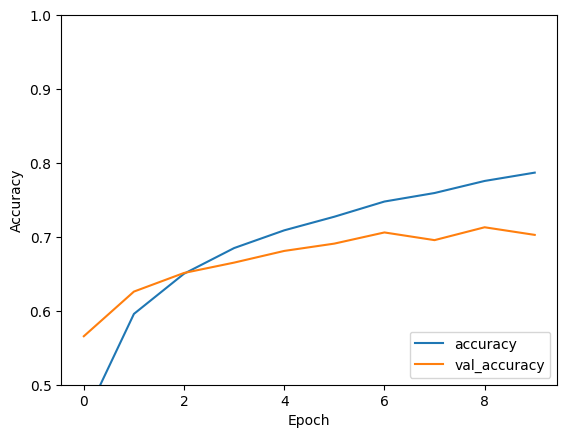

In [332]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [333]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)

313/313 - 1s - loss: 0.8887 - accuracy: 0.7027 - 689ms/epoch - 2ms/step
Test accuracy: 0.7027000188827515
